In [1]:
#liblary yang dipakai pada project ini
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
#membuka data
df = pd.read_csv('Documents/Portofolio/datamentah/dataspotify.csv')
data = df[['year','popularity','acousticness', 'danceability', 'energy', 'liveness', 'loudness','valence', 'name', 'artists', 'tempo']]
#memeriksa kekosongan data
data.isna().sum()

year            0
popularity      0
acousticness    0
danceability    0
energy          0
liveness        0
loudness        0
valence         0
name            0
artists         0
tempo           0
dtype: int64

In [3]:
#memeriksa nilai data
data.describe()

,year,popularity,acousticness,danceability,energy,liveness,loudness,valence,tempo
count,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,1977.061764,25.693381,0.499228,0.536758,0.482721,0.211123,-11.750865,0.524533,117.006500
std,26.907950,21.872740,0.379936,0.176025,0.272685,0.180493,5.691591,0.264477,30.254178
min,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000
25%,1955.000000,1.000000,0.087700,0.414000,0.249000,0.099200,-14.908000,0.311000,93.931000
50%,1977.000000,25.000000,0.517000,0.548000,0.465000,0.138000,-10.836000,0.536000,115.816000
75%,1999.000000,42.000000,0.895000,0.669000,0.711000,0.270000,-7.499000,0.743000,135.011000
max,2021.000000,100.000000,0.996000,0.988000,1.000000,1.000000,3.855000,1.000000,243.507000


In [4]:
#menyeleksi data yang akan digunakan
data2 = data[data['year'] > 2015]
data3= data2[data2['popularity'] > 50]
data4 = data3.drop(['year', 'popularity','artists', 'name'], axis = 1)

In [5]:
data3.describe()

,year,popularity,acousticness,danceability,energy,liveness,loudness,valence,tempo
count,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000
mean,2018.091790,70.030322,0.267542,0.652234,0.598609,0.175955,-7.260808,0.454027,120.771609
std,1.493549,7.140064,0.276148,0.162950,0.190511,0.136304,3.936067,0.227106,30.845355
min,2016.000000,51.000000,0.000000,0.000000,0.000020,0.000000,-54.376000,0.000000,0.000000
25%,2017.000000,65.000000,0.044200,0.556000,0.479000,0.098400,-8.325250,0.277000,96.022750
50%,2018.000000,70.000000,0.162000,0.669000,0.613000,0.121000,-6.474000,0.445000,120.019000
75%,2019.000000,75.000000,0.416000,0.767000,0.733000,0.203000,-5.033500,0.620000,143.006250
max,2021.000000,100.000000,0.996000,0.980000,1.000000,0.960000,0.977000,0.980000,220.099000


In [6]:
minmax = preprocessing.MinMaxScaler().fit_transform(data4)

In [7]:
data5 = pd.DataFrame(minmax, index = data4.index, columns = data4.columns)

In [8]:
data5

,acousticness,danceability,energy,liveness,loudness,valence,tempo
19062,0.703815,0.317347,0.484990,0.075625,0.878904,0.229592,0.351455
19064,0.085040,0.858163,0.727995,0.155208,0.921468,0.438776,0.590866
19066,0.069177,0.567347,0.537991,0.204167,0.884649,0.296939,0.654024
19068,0.697791,0.365306,0.556991,0.093958,0.848698,0.504082,0.386385
19070,0.167671,0.758163,0.346987,0.107292,0.780482,0.583673,0.727595
...,...,...,...,...,...,...,...
174351,0.009880,0.540816,0.758995,0.332292,0.854678,0.512245,0.599726
174353,0.717871,0.748980,0.345987,0.410417,0.770582,0.948980,0.403677
174355,0.500000,0.609184,0.367987,0.113542,0.798963,0.602041,0.781376
174361,0.105422,0.796939,0.486990,0.083542,0.850451,0.333673,0.590375


In [9]:
#mencari nilai klastering yang baik
scr=[]
for i in range (1,20):
    score = KMeans(n_clusters = i).fit(data5).score(data5)
    print(score)
    scr.append(score)

-1160.2496620039922
-793.2580815649499
-646.9035747709173
-584.5270748012108
-540.4756321804812
-506.4211978604723
-476.56713984888023
-452.72697375517254
-435.1869123242922
-414.8599919283499
-399.7805177449435
-385.2683271394844
-373.6967272250634
-362.7820073763005
-354.2234381584679
-345.70082034061346
-336.8846411082791
-329.7058966472877
-322.70893376997765


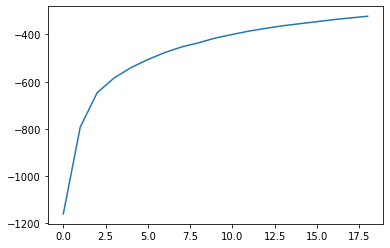

In [10]:
#Untuk menentukan jumlah klaster yang baik adalah dengan mengambil nilai klaster pada lengkungan grafik
plt.plot(scr)

In [11]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data5)

KMeans(n_clusters=3)

In [12]:
data5['clusters'] = kmeans.labels_
data5

,acousticness,danceability,energy,liveness,loudness,valence,tempo,clusters
19062,0.703815,0.317347,0.484990,0.075625,0.878904,0.229592,0.351455,2
19064,0.085040,0.858163,0.727995,0.155208,0.921468,0.438776,0.590866,0
19066,0.069177,0.567347,0.537991,0.204167,0.884649,0.296939,0.654024,0
19068,0.697791,0.365306,0.556991,0.093958,0.848698,0.504082,0.386385,2
19070,0.167671,0.758163,0.346987,0.107292,0.780482,0.583673,0.727595,1
...,...,...,...,...,...,...,...,...
174351,0.009880,0.540816,0.758995,0.332292,0.854678,0.512245,0.599726,0
174353,0.717871,0.748980,0.345987,0.410417,0.770582,0.948980,0.403677,2
174355,0.500000,0.609184,0.367987,0.113542,0.798963,0.602041,0.781376,2
174361,0.105422,0.796939,0.486990,0.083542,0.850451,0.333673,0.590375,0


(array([1914.,    0.,    0.,    0.,    0., 1918.,    0.,    0.,    0.,
        1016.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

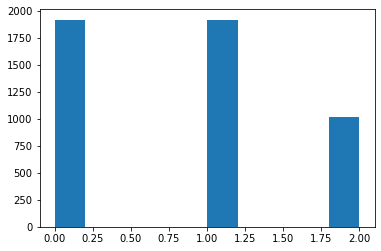

In [13]:
#melihat jumlah lagu pada masing-masing kluster data, musik pada kluster 0 dan 1 lebih banyak dari pada kluster 2
plt.hist(data5['clusters'])

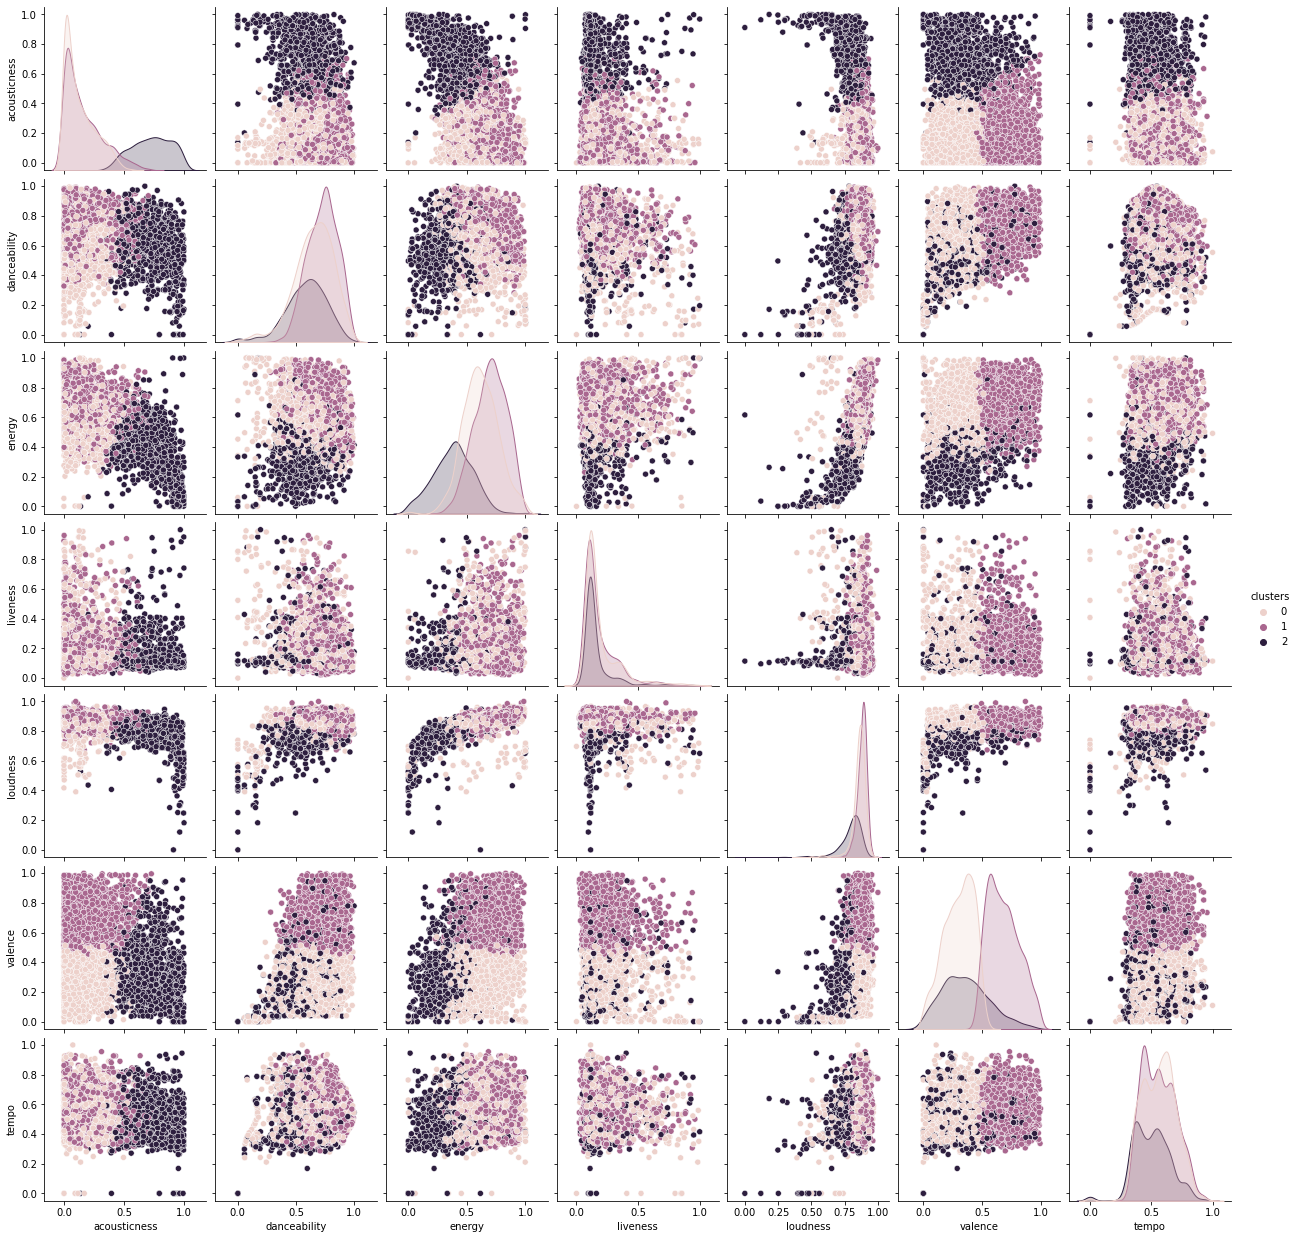

In [14]:
#melihat persebaran data melalui grafik, musik pada pagi hari menggunakan klaster 2, siang hari menggunakan klaster 1, dan pada
#malam hari menggunakan klaster 0 karena pada malam hari orang-orang lebih mendengarkan musik yang tenang untuk membantu tidur
sns.pairplot(data5, hue = 'clusters' )

In [15]:
#menampilkan  judul lagu dan mengurutkan sesuai popularitas lagu
data5[['artists','name', 'popularity']] = data2[['artists','name', 'popularity']]
data5 = data5.sort_values(by = 'popularity', ascending = False)
data5

,acousticness,danceability,energy,liveness,loudness,valence,tempo,clusters,artists,name,popularity
20062,0.723896,0.596939,0.435989,0.109375,0.824075,0.134694,0.653679,2,['Olivia Rodrigo'],drivers license,100
19862,0.221888,0.714286,0.721994,0.283333,0.918071,0.771429,0.413400,1,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19866,0.469880,0.752041,0.801996,0.096979,0.896157,0.695918,0.654319,1,['Ariana Grande'],positions,96
19886,0.402610,0.745918,0.572991,0.117708,0.800625,0.147959,0.499448,0,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95
19976,0.212851,0.880612,0.665993,0.107292,0.907232,0.855102,0.744701,1,['KAROL G'],BICHOTA,95
...,...,...,...,...,...,...,...,...,...,...,...
20194,0.585341,0.516327,0.632993,0.126042,0.878381,0.248980,0.386417,2,"['Morgan Wallen', 'Ben Burgess']",Outlaw (feat. Ben Burgess),51
20196,0.112450,0.513265,0.798996,0.308333,0.899373,0.473469,0.681830,0,"['Morgan Wallen', 'Chris Stapleton']",Only Thing That’s Gone (feat. Chris Stapleton),51
20200,0.465863,0.417347,0.625992,0.193750,0.828934,0.457143,0.381210,2,['Morgan Wallen'],Quittin’ Time,51
158707,0.527108,0.688776,0.304986,0.377083,0.761747,0.421429,0.580439,2,['Pentatonix'],The Lucky Ones,51


In [16]:
#Menampilkan 100 Rekomendasi musik malam
dp = data5[data5['clusters'] == 0]
dp = dp[['artists', 'name', 'popularity']]
dp[:100]

,artists,name,popularity
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94
19872,['The Kid LAROI'],WITHOUT YOU,94
39252,['Tiësto'],The Business,92
19880,"['Cardi B', 'Megan Thee Stallion']",WAP (feat. Megan Thee Stallion),92
...,...,...,...
19762,['Lil Tecca'],Ransom,82
20040,"['Big Sean', 'Post Malone']",Wolves (feat. Post Malone),82
39316,['Pop Smoke'],Element,82
19716,['Juice WRLD'],Empty,81


In [17]:
#Menampilkan 100 rekomendasi musik siang
ds = data5[data5['clusters'] == 1]
ds[:100]
ds = ds[['artists', 'name', 'popularity']]
ds[:100]

,artists,name,popularity
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19866,['Ariana Grande'],positions,96
19976,['KAROL G'],BICHOTA,95
19868,['Ariana Grande'],34+35,94
19870,['CJ'],Whoopty,94
...,...,...,...
110112,"['Sigala', 'James Arthur']",Lasting Lover,83
20050,['The Kid LAROI'],ALWAYS DO,83
19958,"['DDG', 'Blueface']",Moonwalking in Calabasas (feat. Blueface) - Remix,83
19552,['Panic! At The Disco'],High Hopes,83


In [18]:
#Menampilkan 100 rekomendasi musik pagi
dm = data5[data5['clusters'] == 2]
dm[:100]
dm = dm[['artists', 'name', 'popularity']]
dm[:100]

,artists,name,popularity
20062,['Olivia Rodrigo'],drivers license,100
19878,['Pop Smoke'],What You Know Bout Love,93
19900,['Tate McRae'],you broke me first,93
19908,"['Justin Bieber', 'benny blanco']",Lonely (with benny blanco),92
19864,['SZA'],Good Days,91
...,...,...,...
39348,['Taylor Swift'],the 1,79
39340,['Taylor Swift'],cowboy like me,79
39332,['Juice WRLD'],Stay High,79
39330,['Taylor Swift'],dorothea,79
